In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats, integrate
# from numpy.fft import fft, fftfreq
from numpy.fft import rfft, rfftfreq, irfft
import os

In [2]:
import time
t0 = time.perf_counter()

# Global parameters

In [37]:
data_file = 0
# data_file = 1

# Data

In [49]:
filename = ['', '']

path = '/home/investigator/mariandbt/python/data/'
path = path + '20230222/'

filename[0] = os.path.join(path, 'C1--Trace--COMBINED.txt') 
filename[1] = os.path.join(path, 'C2--Trace--COMBINED.txt') 


In [2]:
path = '/home/investigator/mariandbt/python/data/'
# path = path + '20230124/'
path = path + '20230119/'

filename = os.path.join(path, 'Acq_LED1.04V_PMT5.5V_gan0.8.txt')
# filename = os.path.join(path, 'pmt_without_fibers_dig2-192.168.0.254-05.txt')

with open(filename) as f:
    data = np.loadtxt(f)

In [50]:
data = []
with open(filename[data_file],'r', encoding='ascii') as fp:
    for i, line in enumerate(fp):
        if any(c.isalpha() for c in line[:7]) == False:
            data.append(np.asarray(line[:-1].split(','), dtype=float))
fp.close()

In [ ]:
waveform = np.array(data)


n_points = int(np.where(waveform[:, 0] == waveform[:, 0].max())[0][0] + 1)
n_frames = int(len(waveform)/n_points) 

# Analysis

### Waveform

frame =  31


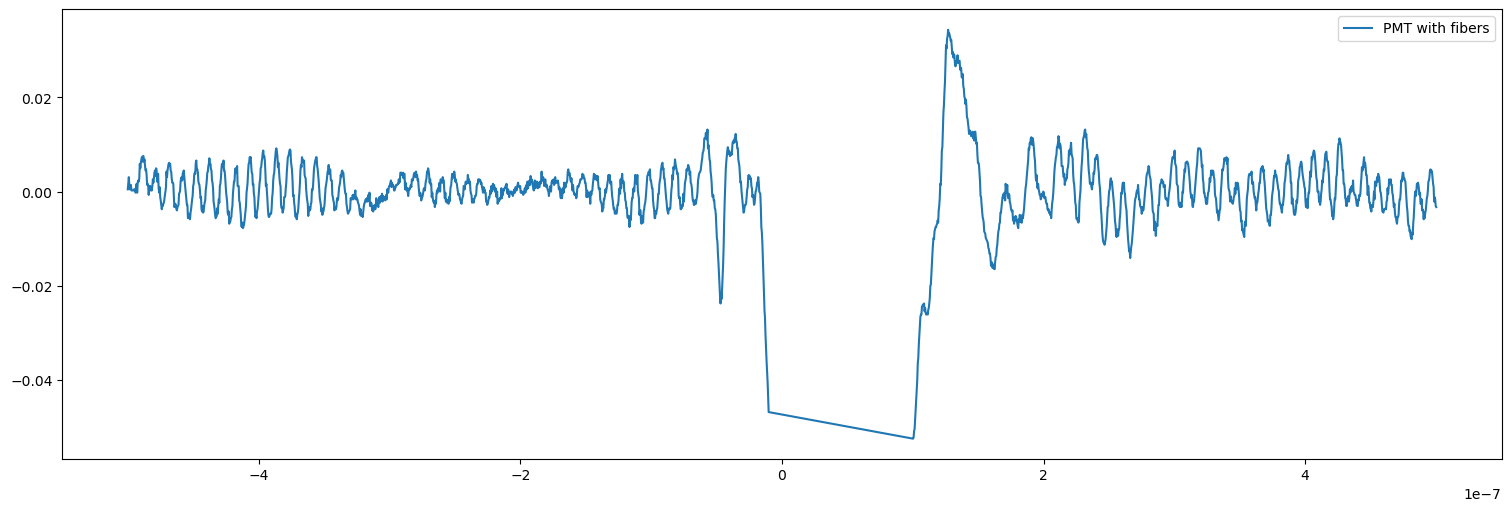

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

frame = int(n_frames/2)
# frame = 1
print('frame = ', frame)

wave = waveform[frame*n_points: (frame + 1)*n_points].copy()

signal = wave[:, 1]
t = wave[:, 0]
dt = t[1] - t[0]

ax.plot(t, signal, label = 'PMT with fibers')
ax.legend(loc = 'best')

### FFT

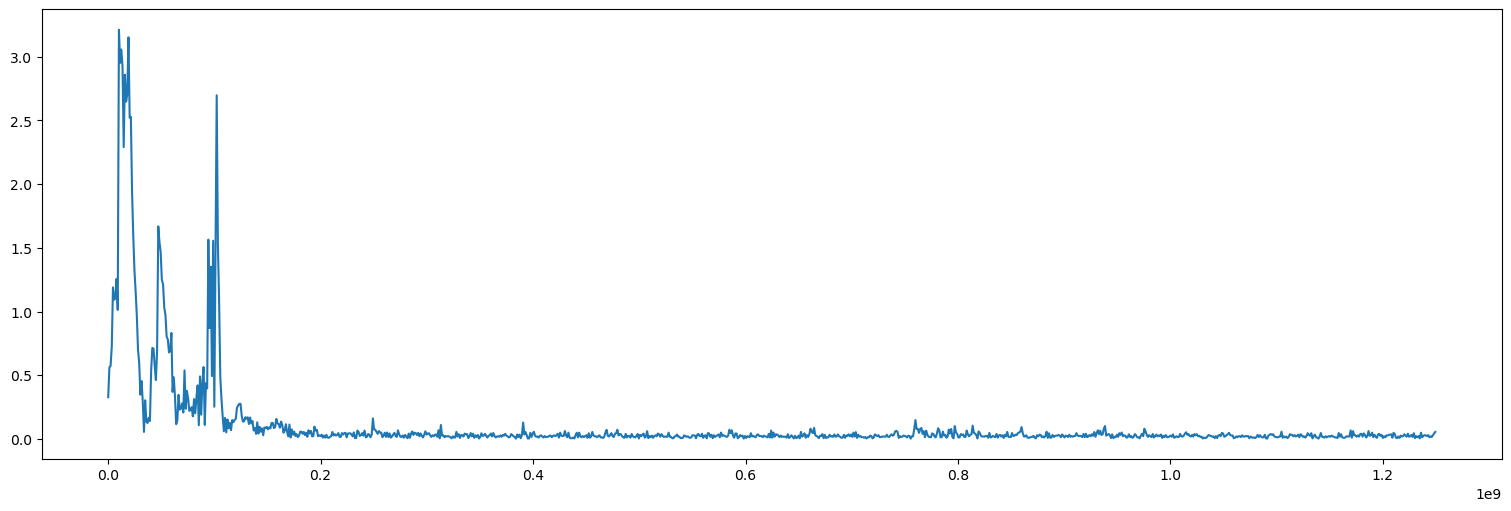

In [52]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

n    = len(t)
yf   = rfft(signal)
xf   = rfftfreq(n, dt)

ax.plot(xf,np.abs(yf))

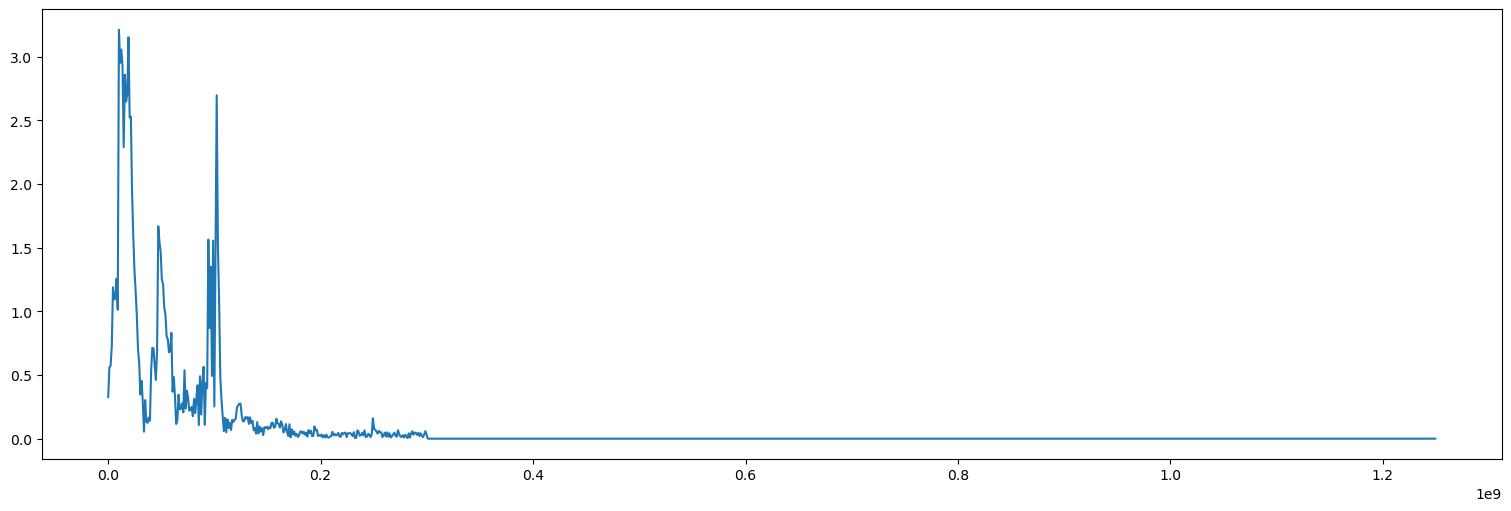

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

th_amp = 2.5
# th_period = 2e-6
th_hz = 3e8
# th_hz = 1/th_period

yf_abs      = np.abs(yf) 
xf_abs      = np.abs(xf) 

# mask     = yf_abs > th_amp   # mask to save ONLY values with amplitude > th counts
mask     = xf_abs < th_hz   # mask to save ONLY values with frequency < th Hz

yf_clean    = mask * yf # noise frequency will be set to 0

ax.plot(xf,np.abs(yf_clean))

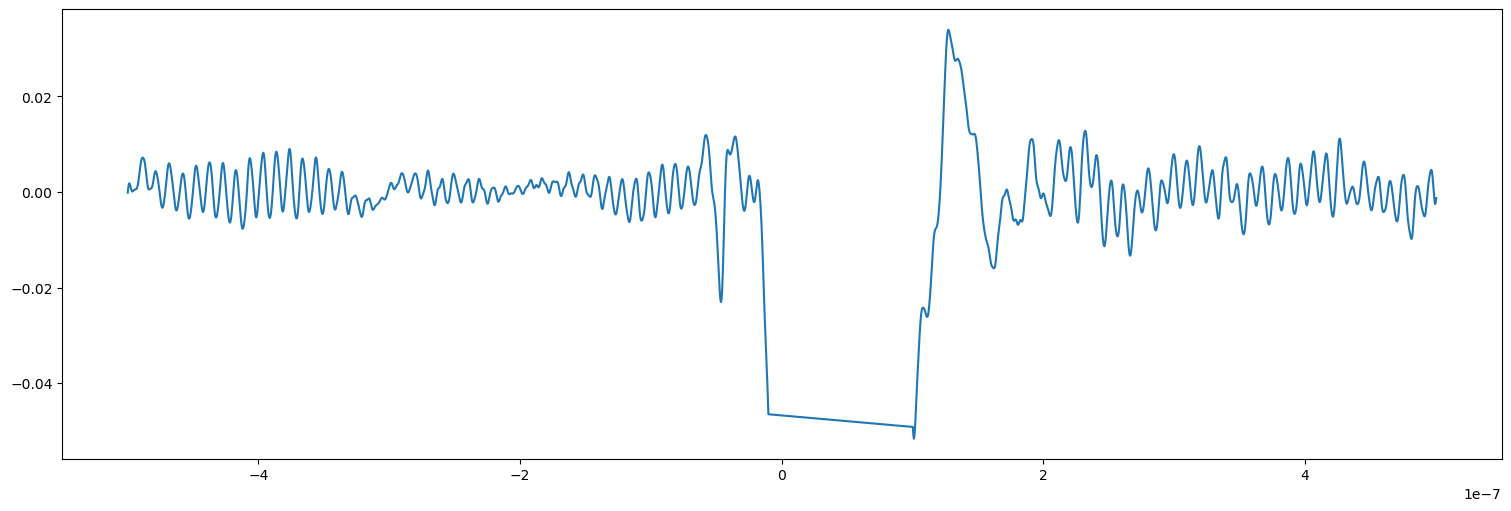

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

new_f_clean = irfft(yf_clean)

# ax.plot(t[:-1],new_f_clean)
ax.plot(t[1:],new_f_clean)

# Timer

In [10]:
tf = time.perf_counter()
print('Code timer: %.2f'%((tf-t0)/1e3))

Code timer: 0.00
